# Data analysis on 2+1D CDT universes

Author: Seda den Boer

Date: 04/04/2024

In [114]:
# Load packages
import sys
sys.path.append('..')
from typing import Dict, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
import pickle
import networkx as nx
import math
from matplotlib.tri import Triangulation
from classes.universe import Universe
from classes.helper_functions.helpers import get_spatial_neighbours, get_vertices_in_slice

In [115]:
# Load files
k0_values = [0, 1, 2, 3, 4, 5, 6, 7]
k3_init_guess = [1.0417799999999955, 1.1760799999999827, 1.3237199999999882, 1.4782399999999793, 1.6480799999999842, 1.8284799999999846, 2.0621400000000256, 2.3117000000000187]
filenames = [f'saved_universes/thermal_1000/universe_k0={k0}_tswps=1000_swps=0_kstps=1000000_trgtv=10000_trgtv2=0_fx=0_chn=0_thermal_1000.pkl.gz' for k0 in k0_values]


## Critical $k_3$

In [116]:
# Load file
filepath = '/home/seda2102/epic/CDT/src/2+1/experiments/measurements/critical_k3_T3_trgtvN31=10000.pkl.gz'

with gzip.open(filepath, 'rb') as file:
    k3_data = pickle.load(file)

print(k3_data)

[1.0417799999999955, 1.1760799999999827, 1.3237199999999882, 1.4782399999999793, 1.6480799999999842, 1.8284799999999846, 2.0621400000000256, 2.3117000000000187]


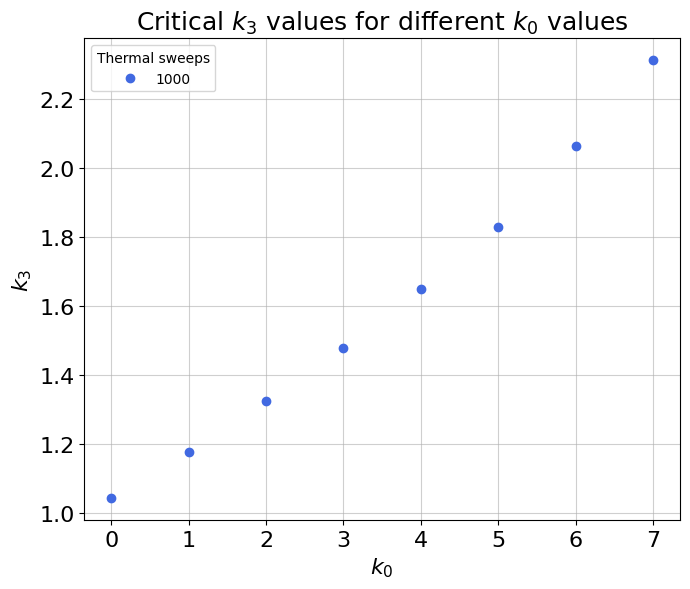

In [117]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.plot(k0_values, k3_data, 'o', color='royalblue', label='1000')  # Plot markers
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()

## Acceptance ratios

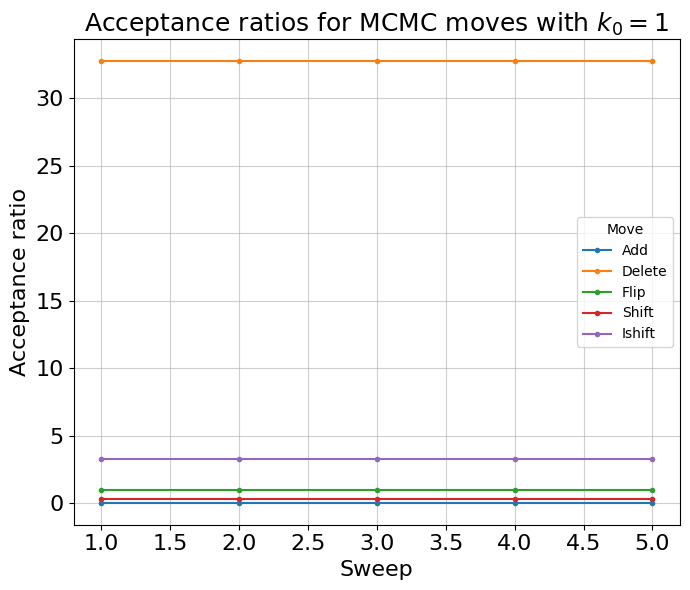

In [118]:
# Load file
filepath = 'measurements/test_k0=1_acceptance_ratios.npy'
acceptance_ratios = np.load(filepath).T
sweeps = np.arange(1, acceptance_ratios.shape[1] + 1)

# Plot acceptance ratios
plt.figure(figsize=(7, 6))
plt.plot(sweeps, acceptance_ratios[0], '.-', label='Add')
plt.plot(sweeps, acceptance_ratios[1], '.-', label='Delete')
plt.plot(sweeps, acceptance_ratios[2], '.-', label='Flip')
plt.plot(sweeps, acceptance_ratios[3], '.-', label='Shift')
plt.plot(sweeps, acceptance_ratios[4], '.-', label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title('Acceptance ratios for MCMC moves with $k_0=1$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## Succes rates

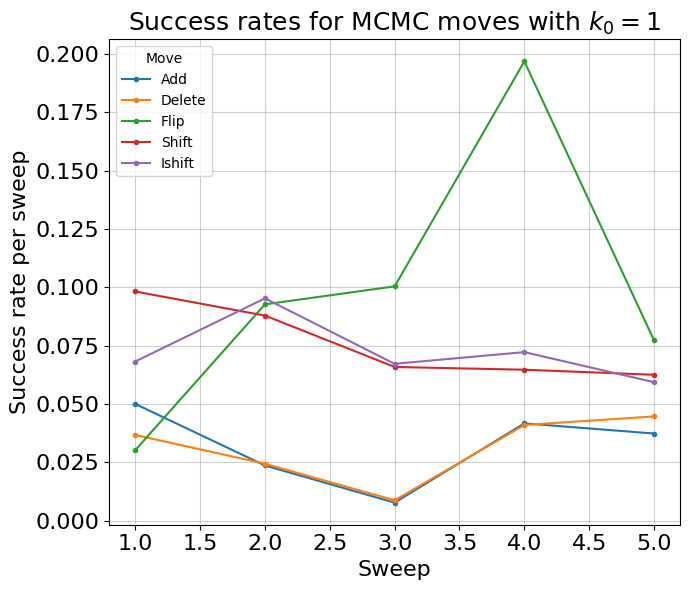

In [119]:
# Load files
filepath_successes = 'measurements/test_k0=1_successes.npy'
filepath_fails = 'measurements/test_k0=1_fails.npy'
successes = np.load(filepath_successes).T
fails = np.load(filepath_fails).T
sweeps = np.arange(1, successes.shape[1] + 1)

# Get the success rate 
success_rate = successes / (successes + fails)

# Plot success rate
plt.figure(figsize=(7, 6))
plt.plot(sweeps, success_rate[0], '.-', label='Add')
plt.plot(sweeps, success_rate[1], '.-', label='Delete')
plt.plot(sweeps, success_rate[2], '.-', label='Flip')
plt.plot(sweeps, success_rate[3], '.-', label='Shift')
plt.plot(sweeps, success_rate[4], '.-', label='Ishift')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate per sweep', fontsize=16)
plt.title('Success rates for MCMC moves with $k_0=1$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()


### Zoom-in

## $<N_{22}/N_{31}>$

### Over time

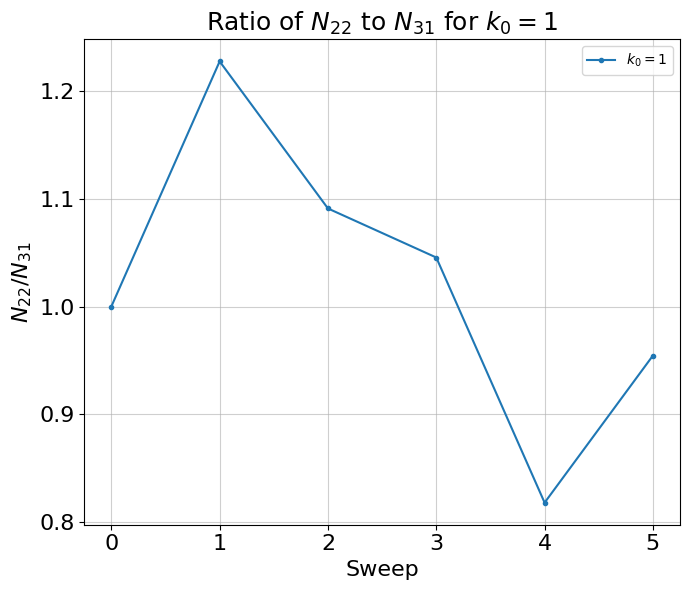

In [120]:
# Load files
filepath_n22 = 'measurements/test_k0=1_n_tetras_22.npy'
filepath_n31 = 'measurements/test_k0=1_n_tetras_31.npy'
n_tetras_22 = np.load(filepath_n22).T
n_tetras_31 = np.load(filepath_n31).T

# Get the ratio of n22 to n31
ratio_n22_n31 = n_tetras_22 / n_tetras_31

# Plot ratio of n22 to n31
plt.figure(figsize=(7, 6))
plt.plot(ratio_n22_n31, '.-', label='$k_0=1$')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22} / N_{31}$', fontsize=16)
plt.title('Ratio of $N_{22}$ to $N_{31}$ for $k_0=1$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(fancybox=True)
plt.tight_layout()

### Phase transition

In [121]:
# Open files for all k0 values


## Volume

### Spatial volume

In [122]:
# Load file
filepath = 'measurements/test_k0=1_slice_sizes.npy'
slice_sizes = np.load(filepath)

print(slice_sizes)


[[ 6.  6.  6.]
 [ 8.  8.  6.]
 [10.  6.  6.]
 [10.  6.  6.]
 [12.  4.  6.]
 [10.  4.  8.]]


In [128]:
print(n_tetras_22 + n_tetras_31)
print(np.load('measurements/test_k0=1_n_tetras.npy'))	

[36 49 46 45 40 43]
[54 71 68 67 62 65]


### Total tetrahedron volume

In [124]:
filepath = 'measurements/test_k0=1_slab_sizes.npy'
slab_sizes = np.load(filepath)

print(slab_sizes)

[[18. 18. 18.]
 [22. 23. 26.]
 [23. 18. 27.]
 [20. 18. 29.]
 [18. 14. 30.]
 [19. 16. 30.]]


## Curvature

## Spectral dimension

In [125]:
def plot_spectral_dimension_per_timeslice(infile: str, diffusion_times: List[int]):
    pass

def plot_spectral_dimension(infile: str, diffusion_times: List[int]):
    pass

## Visualisation

### Network timeslices

In [126]:
def generate_timeslice_graphs(universe: Universe, save: bool, filename: str) -> Dict[int, nx.Graph]:
    T = universe.n_slices
    vertices_in_slice = get_vertices_in_slice(universe)
    spatial_neighbours = get_spatial_neighbours(universe)
    graphs = {t: None for t in range(T)}

    # Generate the graph
    for t, vertex_ids in vertices_in_slice.items():
        G = nx.Graph()

        for vertex_id in vertex_ids:
            vertex = universe.vertex_pool.get(vertex_id)
            G.add_node(
                vertex_id,
                time=vertex.time,
                tetrahedron=vertex.tetra.ID,
                degree=len(universe.vertex_neighbours[vertex.ID]),
                cnum=vertex.cnum,
                scnum=vertex.scnum,
            )
        
        for vertex_id in vertex_ids:
            for spatial_neighbour_id in spatial_neighbours[vertex_id]:
                G.add_edge(vertex_id, spatial_neighbour_id)

        pos = nx.planar_layout(G)
        print(pos)
        for node,(x,y) in pos.items():
            G.nodes[node]['x'] = float(x)
            G.nodes[node]['y'] = float(y)

        graphs[t] = G

        if nx.check_planarity(G):
            print(f'The spatial slice {t} is planar')
        else:
            print(f'The spatial slice {t} is not planar')
            
        if save:
            nx.write_gexf(G, f'{filename}_t={t}.gexf')
    
    return graphs

def visualise_timeslices(graphs: Dict[int, nx.Graph]):
    # Plot each graph
    for t in range(len(graphs)):
        G = graphs[t]

        if G:
            plt.figure()
            pos = nx.spring_layout(G)
            nx.draw(G, pos, node_size=1, node_color="blue")
            plt.title(f"Time slice {t}")
            plt.axis("equal")

In [127]:
# universe_0 = Universe(geometry_infilename=filenames[0])
# graphs = generate_timeslice_graphs(universe_0, True, 'networks/graph_k0=0')

### Trinagulation timeslices